In [25]:
from scipy.sparse import load_npz
from hdnet import spikes
import numpy as np
import matplotlib.pyplot as plt
from hdnet_contrib.CDMentropy import CDMentropy

(752276, 61)
<Spikes: 61 neurons, 752276 bins, 1 trials>
(1, 61, 752276)


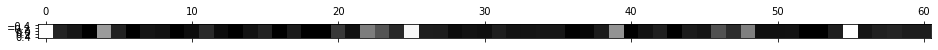

In [23]:
ys = load_npz("./../data/MEA-37578-electricalStim-StimTimes-uint_N_61_1600_sparse.npz").toarray()
print(np.shape(ys))
true_spikes=spikes.Spikes(ys.T)
print(true_spikes)
print(np.shape(true_spikes._spikes))
plt.matshow(true_spikes.NOrderInteractions(1), cmap='gray')
plt.show()

In [26]:
cdme = CDMentropy(source='/home/shiven/Desktop/hdnet_contrib/hdnet_contrib/PyCDMentropy/CDMentropy', spikes=true_spikes)
I = cdme.mutualInformationWindowed(trial=0, time_start=0, neuron_start=0, stimulus_start=35, tau=50000, time_end=5000, 
    neuron_end=25, stimulus_end=61)
print("MI",I)

MI 0.10176393598874167


In [28]:
E = cdme.entropyCDM(trial=0, time_start=0, neuron_start=0, time_end=1000, neuron_end=50)
print("Entropy",E)

Entropy 5.730459752151105


In [ ]:
from tqdm import tqdm
X=[]
Y=[]
T=[]
for j in tqdm(range(100,1100,50)):
    T.append(j)
    x=[]
    y=[]
    for i in range(0,10):
        x.append(i)
        y.append(cdme.mutualInformationWindowed(trial=0, time_start=0, neuron_start=0, stimulus_start=60, tau=i, time_end=j, 
        neuron_end=30, stimulus_end=61))
    X.append(x)
    Y.append(y)

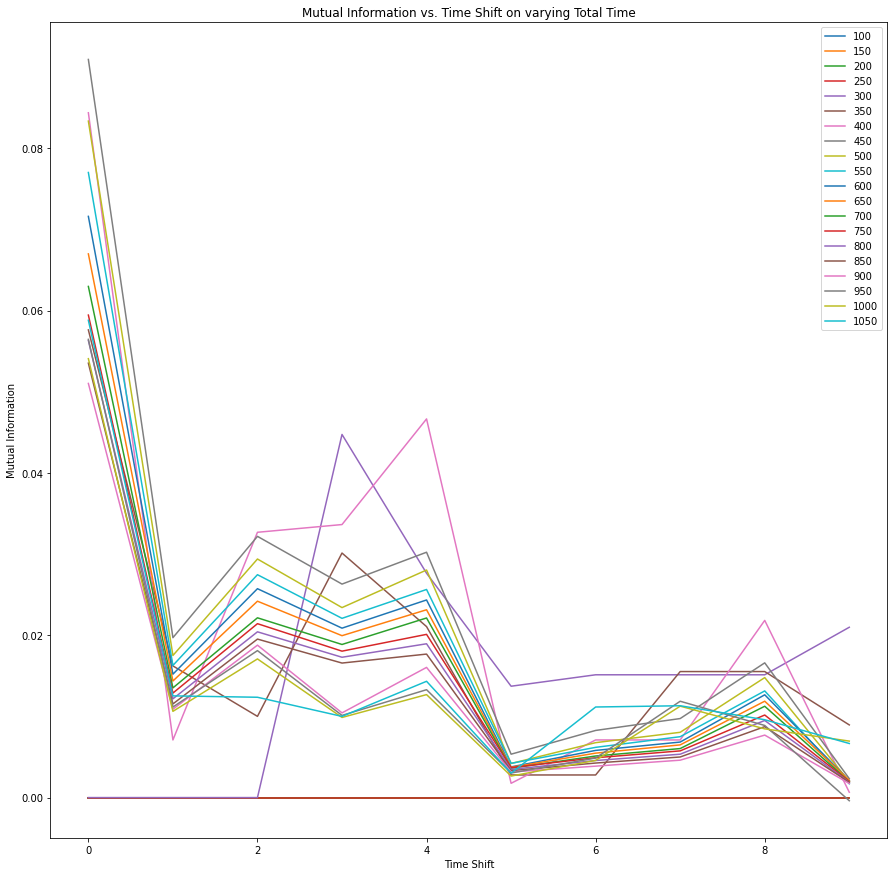

In [32]:
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 10})
for i in range(len(X)):
    plt.plot(X[i],Y[i])
plt.title("Mutual Information vs. Time Shift on varying Total Time")
plt.xlabel("Time Shift")
plt.ylabel("Mutual Information")
plt.legend([str(T[i]) for i in range(len(T))])
plt.show()